# Mazen Ibrahim
##  Titanic - Who Will Survive?

### Clean the Train Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The steps I will take to clean this dataset:  
1) Check for null values and duplicates and fix them  
2) Check for data type issues and fix them  
3) Check for outliers and fix them

In [2]:
# Identify what needs to be cleaned in the data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As seen above, many columns have multiple null values that need to be cleaned. There doesn't seem to be any data type issues.

In [3]:
# Check for the amount of null values and duplicates in the train dataset
print("Num of duplicates: " , data_train.duplicated().sum())
data_train.isna().sum()

Num of duplicates:  0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# For the 2 null values in the Embarked column, I will replace them with random values
data_train['Embarked'] = data_train['Embarked'].replace(np.nan, data_train['Embarked'].sample(1).values[0])
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
# For the 177 null values in the Age column, I will replace them with the mean in order to maintain the mean
age_mean = data_train['Age'].mean()
print(f"The mean of Age before: {age_mean}")

data_train.fillna({'Age' : age_mean}, inplace=True)
age_mean = data_train['Age'].mean()
print(f"The mean of Age After: {age_mean}")
data_train.isna().sum()

The mean of Age before: 29.69911764705882
The mean of Age After: 29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
# For the 687 null values in the cabin column, I will drop this column because it is irrelevant
data_train.drop(['Cabin'], axis=1, inplace=True)
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now I will check for outliers

In [8]:
# Detecting outliers
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the looks of the table above, the fare must have an outlier due to the huge difference between the max value and the 75% value.  
I will plot the Fare in order to get a visualization

<Axes: ylabel='Fare'>

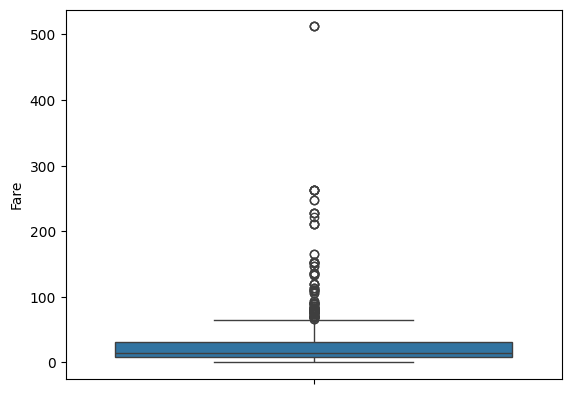

In [9]:
sns.boxplot(data_train['Fare'])

<Axes: ylabel='Fare'>

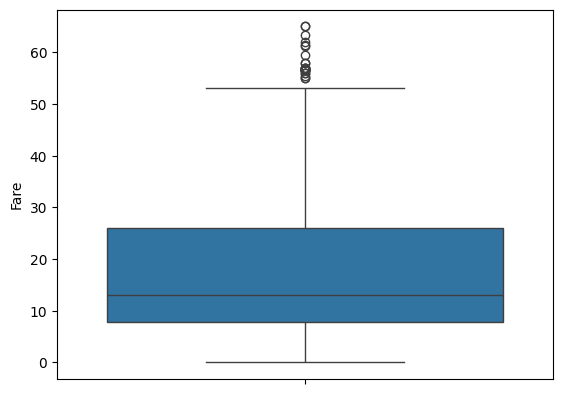

In [10]:
# Remove the outliers using the Interquartile Range Method
lowerQuartile = data_train['Fare'].quantile(0.25)
upperQuartle = data_train['Fare'].quantile(0.75)
IQR = upperQuartle - lowerQuartile
data_train = data_train[ (data_train['Fare'] >= (lowerQuartile - (1.5*IQR))) & (data_train['Fare'] <= (upperQuartle + (1.5*IQR))) ]
sns.boxplot(data_train['Fare'])

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    object 
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked     775 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 72.7+ KB


## Done Cleaning!

## Now I will explore the relationships of socio-economic status with other age, gender, and number of family members.

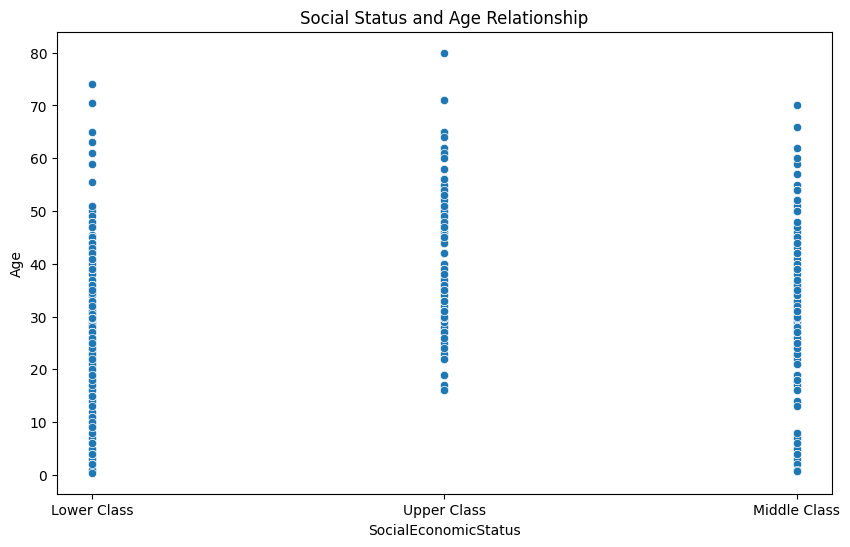

In [12]:
# I will create a social status column and plot graphs in order to visualize the relationships with other features
data_train['SocialEconomicStatus'] = data_train['Pclass'].map({1 : 'Upper Class', 2 : 'Middle Class', 3 : 'Lower Class'})
# Relationship between age and status:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SocialEconomicStatus', y='Age', data=data_train)
plt.title('Social Status and Age Relationship')
plt.show()

Upper Class seem to have more older people than other social classes and no one under the age of around 15 belongs to the upper class. Middle class and lower class have younger people and their scatter look similar.

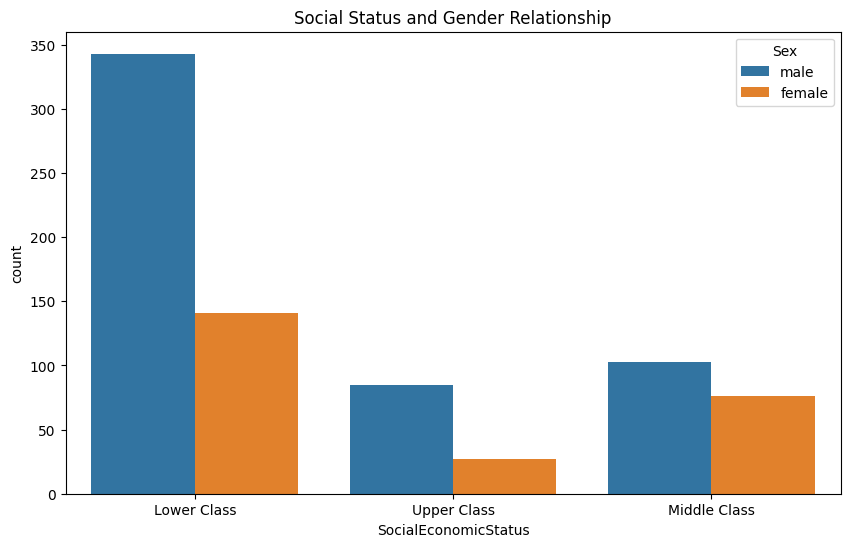

In [13]:
# Relationship between gender and status
plt.figure(figsize=(10,6))
sns.countplot(x='SocialEconomicStatus', hue='Sex', data=data_train)
plt.title('Social Status and Gender Relationship')
plt.show()

As seen in the count plot above, more males are upper class than females and that is the case as well for the lower class. More females belong to middle class than males but not by a huge difference compared to the other classes.

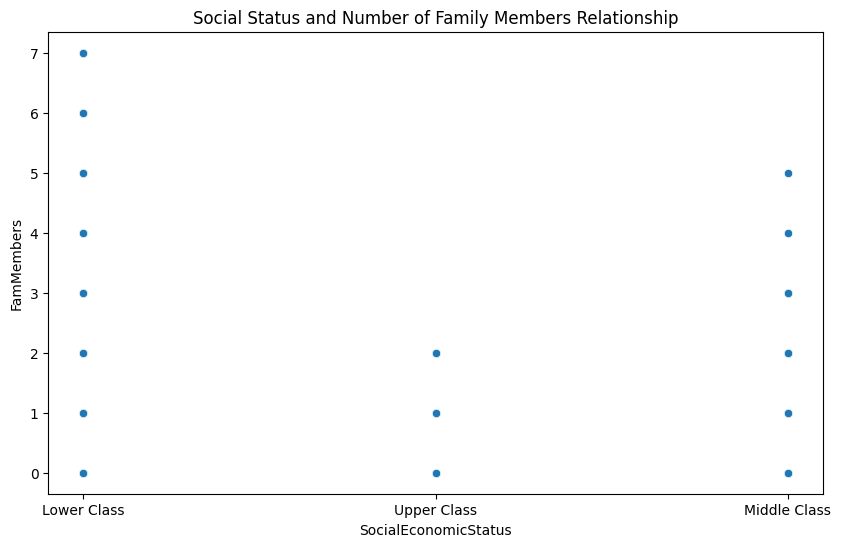

In [14]:
# Relationship between family members and status
data_train['FamMembers'] = data_train['Parch'] + data_train['SibSp']
plt.figure(figsize=(10,6))
sns.scatterplot(x='SocialEconomicStatus', y='FamMembers', data=data_train)
plt.title('Social Status and Number of Family Members Relationship')
plt.show()

The class with the most family members is the Lower class with family size of up to 7. Upper class families have 2 members max as seen above and similarily the middle class family size doesn't exceed 3 family members.

## Now I will explore the distribution of survival victims in relation to age, gender, and social class.

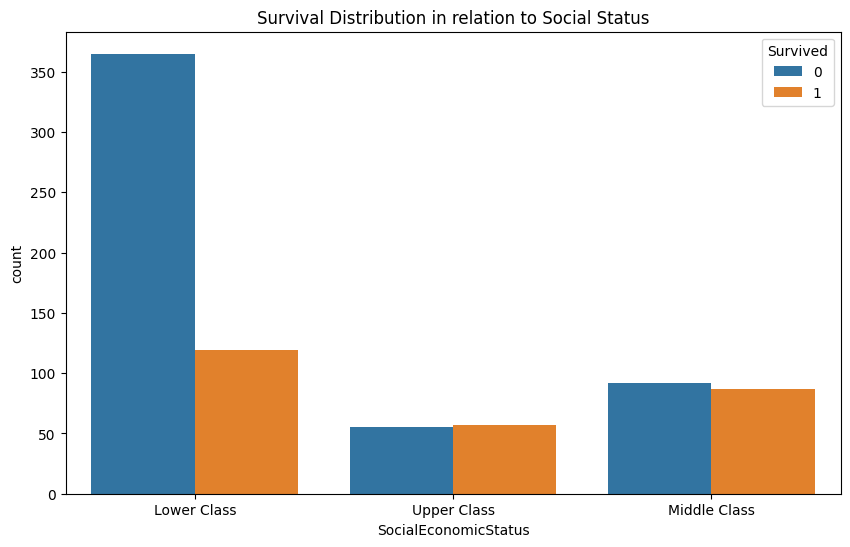

In [15]:
# Survival Distribution in relation to Social Status
plt.figure(figsize=(10,6))
sns.countplot(x='SocialEconomicStatus', hue='Survived', data=data_train)
plt.title('Survival Distribution in relation to Social Status')
plt.show()

Most survivals and most deaths as well belong to the upper class as seen in the count plot above but more survived from the upper class. More people survived in the middle class than died in contrast of the lower class where the amount of people died is way more than the people that survived.

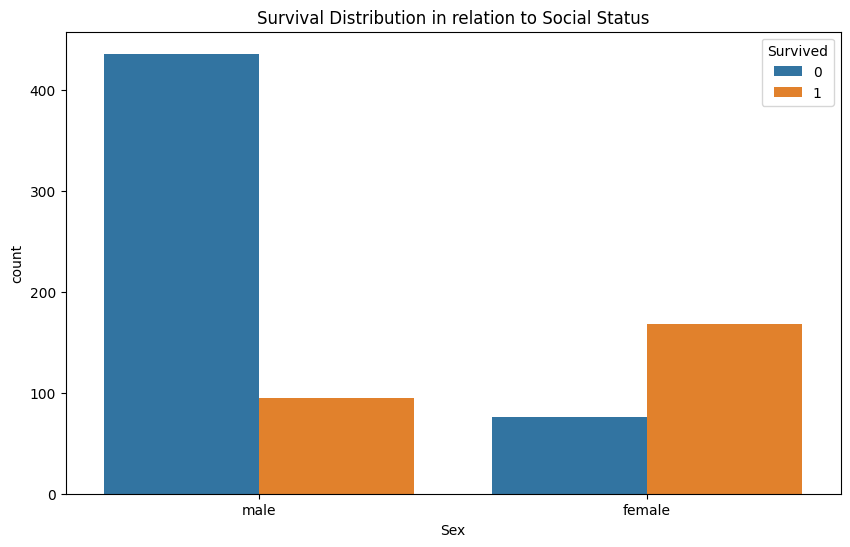

In [16]:
# Survival Distribution in relation to Gender
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=data_train)
plt.title('Survival Distribution in relation to Social Status')
plt.show()

From the count plot above we see that more females survived the Titanic than males and we also see that the amount of deaths in males is much greater than the amount of deaths in females.

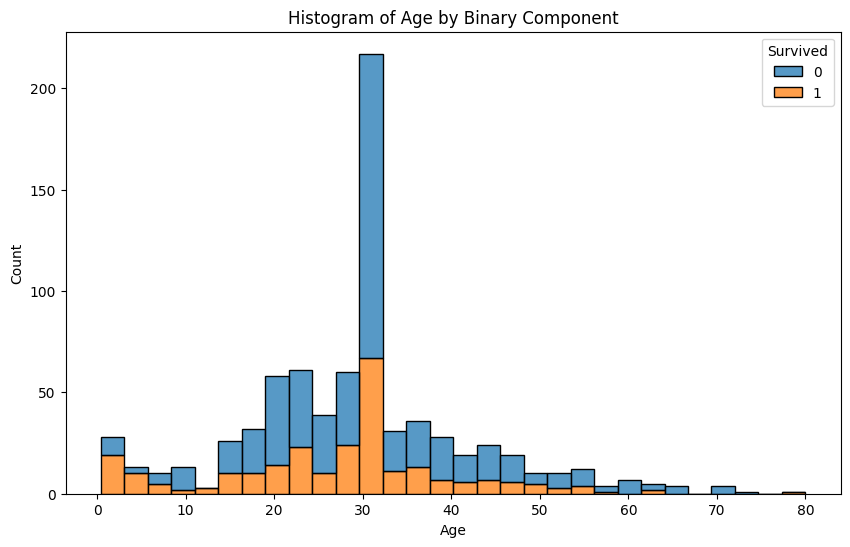

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=data_train, multiple='stack', bins=30)
plt.title('Histogram of Age by Binary Component')
plt.show()

The age with the most deaths and survivals is around 30 years old, more deaths than survivals unfortunately. The only ages where there are more survivals than deaths are ages in the early 20s and greater than 75 years old.

In [18]:
# Representing the previous in numbers
survival_status = data_train.groupby('SocialEconomicStatus')['Survived'].mean()
print("\nSurvival Rate by Socio-Economic Status:\n", survival_status)

survival_gender = data_train.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:\n", survival_gender)

survival_age = data_train.groupby('Survived')['Age'].describe()
print("\nAge Distribution by Survival:\n", survival_age)


Survival Rate by Socio-Economic Status:
 SocialEconomicStatus
Lower Class     0.245868
Middle Class    0.486034
Upper Class     0.508929
Name: Survived, dtype: float64

Survival Rate by Gender:
 Sex
female    0.688525
male      0.178908
Name: Survived, dtype: float64

Age Distribution by Survival:
           count       mean        std   min   25%        50%    75%   max
Survived                                                                 
0         512.0  30.214058  12.301122  1.00  23.0  29.699118  35.00  74.0
1         263.0  26.942621  13.426807  0.42  19.0  29.699118  32.25  80.0


## In order to pick the most important features for the prediction, I will analyze the correlation in this dataset to identify the importance of each feature compared to surviving.

In [19]:
# First see what colums are unnecessary and then drop them
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           775 non-null    int64  
 1   Survived              775 non-null    int64  
 2   Pclass                775 non-null    int64  
 3   Name                  775 non-null    object 
 4   Sex                   775 non-null    object 
 5   Age                   775 non-null    float64
 6   SibSp                 775 non-null    int64  
 7   Parch                 775 non-null    int64  
 8   Ticket                775 non-null    object 
 9   Fare                  775 non-null    float64
 10  Embarked              775 non-null    object 
 11  SocialEconomicStatus  775 non-null    object 
 12  FamMembers            775 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 84.8+ KB


In [20]:
# Drop the unnecessary columns in both test and train
data_train.drop(columns=['Ticket', 'Name', 'PassengerId', 'SocialEconomicStatus'], inplace=True)

# Convert object data types to categories in both test and train
data_train['Sex'] = data_train['Sex'].map({'male' : 0, 'female' : 1})
data_train['Embarked'] = data_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    int64  
 2   Sex         775 non-null    int64  
 3   Age         775 non-null    float64
 4   SibSp       775 non-null    int64  
 5   Parch       775 non-null    int64  
 6   Fare        775 non-null    float64
 7   Embarked    775 non-null    int64  
 8   FamMembers  775 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.5 KB


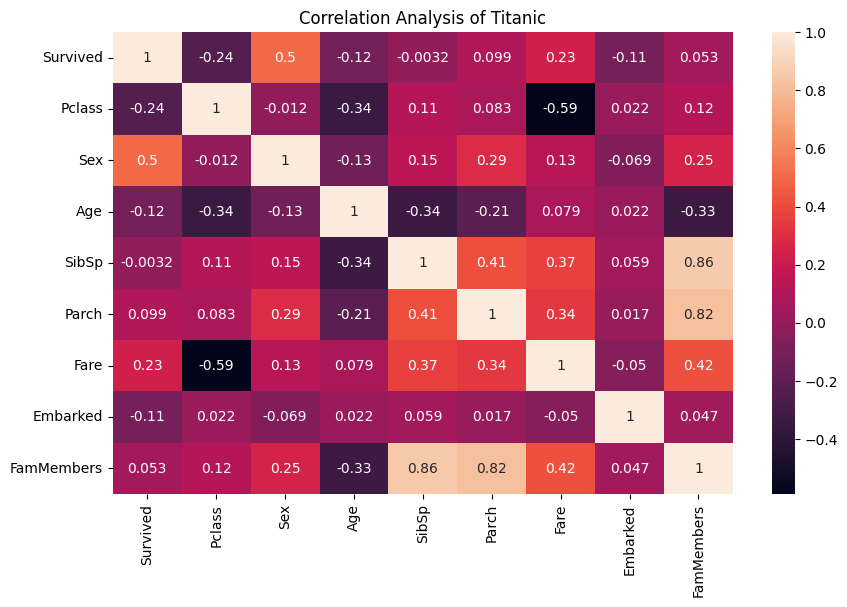

In [21]:
# Visualize a heatmap to see what features have a strong negative or positive correlation
plt.figure(figsize=(10,6))
sns.heatmap(data_train.corr(), annot=True)
plt.title("Correlation Analysis of Titanic")
plt.show()

From the correlation heatmap above, the features that look important are:  
1) Pclass (Negative correlation of -0.27)  
2) Sex (Positive correlation of 0.39)  
3) Fare (Positive correlation of 0.24)
4) FamMembers (Negative correlation of -0.28)

In [22]:
features = data_train[['Pclass', 'Sex', 'Fare', 'FamMembers']]
features.head()

,Pclass,Sex,Fare,FamMembers
0,3,0,7.2500,1
2,3,1,7.9250,0
3,1,1,53.1000,1
4,3,0,8.0500,0
5,3,0,8.4583,0


# 3 Models

## Model 1: Logistic Regression
#### Logistic Regression is a linear model used for classification rather than regression. It is a method to find the best separating line for a given training set. How it works is that it calculates the weighted sum of the input features and applies a logistic (sigmoid) function to map that sum into a probability. To evaluate its preformace, accuracy, precision, recall, and f-score will be calculated.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# First split the data for training and testing 
X = features
y = data_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"X_train shape: {X_train.shape}\n y_train shape: {y_train.shape}\n X_test shape: {X_test.shape}\n y_test shape: {y_test.shape}\n")

X_train shape: (620, 4)
 y_train shape: (620,)
 X_test shape: (155, 4)
 y_test shape: (155,)



In [24]:
# Build the model
logreg_model = LogisticRegression()

# Fitting the model
logreg_model.fit(X_train, y_train)

# Predictions
y_predict_log = logreg_model.predict(X_test)

In [25]:
# Evaluate the model
print("Performance of the Logistic Function Model: ")
print(f"Accuracy: {accuracy_score(y_test, y_predict_log) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_predict_log) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_predict_log) * 100:.2f}%")
print(f"F-score: {f1_score(y_test, y_predict_log) * 100:.2f}%")

Performance of the Logistic Function Model: 
Accuracy: 78.71%
Precision: 77.78%
Recall: 60.34%
F-score: 67.96%


## Model 2: Support Vector Machine (SVM)
#### SVM or Support Vector Machine is a machine learning algorithm that classifies data by drawing a hyperplane to determine boundaries between data points. The best hyperlane is maximizing the distance to the points in either category.

In [26]:
from sklearn.svm import SVC

# Build the model
svm_model = SVC(kernel='linear')

# Fitting the model
svm_model.fit(X_train, y_train)

# Predictions
y_predict_svm = svm_model.predict(X_test)

In [27]:
# Evaluate the model
print("Performance of the SVM Model: ")
print(f"Accuracy: {accuracy_score(y_test, y_predict_svm) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_predict_svm) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_predict_svm) * 100:.2f}%")
print(f"F-score: {f1_score(y_test, y_predict_svm) * 100:.2f}%")

Performance of the SVM Model: 
Accuracy: 77.42%
Precision: 73.47%
Recall: 62.07%
F-score: 67.29%


## Model 3: Nearest Neighbor
#### Nearest Neighbor which training example is most similar to the target. K-Nearest Neighbors is a more robust classification follow from voting over the k closest neighbors for k>1. The algorithm calculate the distance between the sample and the training points in the dataset and selects the k points that are nearest to the sample and assigns it to the class that is most common, in this case survived or not survived.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Build the model
nn_model = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
nn_model.fit(X_train, y_train)

# Predictions
y_predict_nn = nn_model.predict(X_test)

In [29]:
# Evaluate the model
print("Performance of the NN Model: ")
print(f"Accuracy: {accuracy_score(y_test, y_predict_nn) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_predict_nn) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_predict_nn) * 100:.2f}%")
print(f"F-score: {f1_score(y_test, y_predict_nn) * 100:.2f}%")

Performance of the NN Model: 
Accuracy: 78.06%
Precision: 74.00%
Recall: 63.79%
F-score: 68.52%


## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

logreg_model_cv = cross_val_score(logreg_model, X, y, cv=3)
print(f"Logistic Regression CV score: {logreg_model_cv}")
svm_model_cv = cross_val_score(svm_model, X, y, cv=3)
print(f"SVM CV score: {svm_model_cv}")
nn_model_cv = cross_val_score(nn_model, X, y, cv=3)
print(f"Nearest Neighbor CV score: {nn_model_cv}")

Logistic Regression CV score: [0.74903475 0.80232558 0.77131783]
SVM CV score: [0.77220077 0.79457364 0.77131783]
Nearest Neighbor CV score: [0.74903475 0.80232558 0.78682171]
